In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('test.csv')
df2=pd.read_csv('train.csv')

In [3]:
df=df1.append(df2)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [14]:
df.shape

(981, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [15]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [16]:
df.isnull().sum()/len(df)*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

In [17]:
mode_sf_emp=df['Self_Employed'].mode()

In [18]:
mode_sf_emp

0    No
dtype: object

In [19]:
# df['Self_Employed']=df['Self_Employed'].fillna(mode_sf_emp)

In [25]:
df['Self_Employed']=df['Self_Employed'].fillna(method='ffill')

In [20]:
mode_ln_st=df['Loan_Status'].mode()
mode_ln_st

0    Y
dtype: object

In [21]:
# df['Loan_Status']=df['Loan_Status'].fillna(mode_ln_st)

In [26]:
df['Loan_Status']=df['Loan_Status'].fillna(method='ffill')

In [22]:
median_cr=df['Credit_History'].median()
median_cr

1.0

In [23]:
df['Credit_History']=df['Credit_History'].fillna(median_cr)

In [27]:
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.446483
Married              0.305810
Dependents           2.548420
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           2.752294
Loan_Amount_Term     2.038736
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
#Numerical_col
num_col=df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [33]:
#Categorical_col
cat_col=df.select_dtypes(include=['O']).columns
cat_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422.0,152.0,360.0,1.0,Urban,Y
6,LP001055,Female,No,1,Not Graduate,No,2226,0.0,59.0,360.0,1.0,Semiurban,Y
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0.0,147.0,360.0,0.0,Rural,Y
8,LP001059,Male,Yes,2,Graduate,No,13633,0.0,280.0,240.0,1.0,Urban,Y
9,LP001067,Male,No,0,Not Graduate,No,2400,2400.0,123.0,360.0,1.0,Semiurban,Y


# what is the average loan amount for urban proprty area

In [35]:
area=df.groupby('Property_Area')

In [37]:
urban=area.get_group('Urban')
urban

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,1.0,Urban,N
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [38]:
avg_loan=urban['LoanAmount'].mean()
avg_loan

138.92434210526315

In [1]:
# average loan amount for urban property area is 138.9243

# what is the median loan amount for rural property area

In [82]:
rural=area.get_group('Rural')
rural

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0.0,147.0,360.0,0.0,Rural,Y
25,LP001153,Male,No,0,Graduate,No,0,24000.0,148.0,360.0,0.0,Rural,Y
56,LP001317,Female,No,0,Not Graduate,No,4402,0.0,130.0,360.0,1.0,Rural,Y
63,LP001347,Female,No,0,Graduate,No,2101,1500.0,108.0,360.0,0.0,Rural,Y
69,LP001361,Male,Yes,0,Graduate,No,2458,5105.0,188.0,360.0,0.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y


In [83]:
median_loan=rural['LoanAmount'].median()
median_loan

132.0

In [2]:
# Median loan amount for rural property area is 132.0

# how many mail and female applicants are there in data. show graphical representation of data

In [59]:
Male=df[df['Gender']=='Male']['Gender'].count()
Male

719

In [60]:
female=df[df['Gender']=='Female']['Gender'].count()
female

171

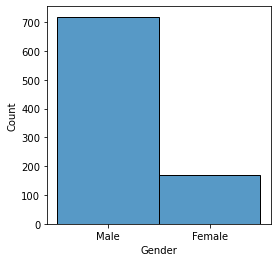

In [65]:
plt.figure(figsize=(4,4))
sns.histplot(df.Gender)
plt.show()

In [3]:
# In the above data there are total 719 males and 171 females 

# show the details of married employees who are not self employeed are applicable for loan 

In [66]:
married=df[df['Married']=='Yes']
married

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,Y
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422.0,152.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [67]:
no_emp=married[married['Self_Employed']=='No']
no_emp

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,Y
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0.0,147.0,360.0,0.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [68]:
loan_st=no_emp[no_emp['Loan_Status']=='Y']
loan_st

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,Y
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0.0,147.0,360.0,0.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [4]:
# these are the details of applicants are married but not self employeed are also applicable for loan

# show the details of persons who are graduate and self employeed but not applicable for loan

In [90]:
graduate=df[df['Education']=='Graduate']
graduate

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,Y
8,LP001059,Male,Yes,2,Graduate,No,13633,0.0,280.0,240.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [92]:
sf_emp=graduate[graduate['Self_Employed']=='Yes']
sf_emp

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
37,LP001210,Male,Yes,0,Graduate,Yes,2267,2792.0,90.0,360.0,1.0,Urban,Y
38,LP001211,Male,No,0,Graduate,Yes,5833,0.0,116.0,360.0,1.0,Urban,Y
61,LP001335,Male,Yes,0,Graduate,Yes,7016,292.0,125.0,360.0,1.0,Urban,Y
73,LP001380,Male,Yes,0,Graduate,Yes,3900,2094.0,232.0,360.0,1.0,Rural,Y
77,LP001413,Male,No,0,Graduate,Yes,6356,0.0,50.0,360.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
591,LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
594,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y


In [93]:
ln_st=sf_emp[sf_emp['Loan_Status']=='N']
ln_st

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
32,LP001097,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
77,LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban,N
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N
186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
199,LP001673,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,N
245,LP001813,Male,No,0,Graduate,Yes,6050,4333.0,120.0,180.0,1.0,Urban,N
254,LP001844,Male,No,0,Graduate,Yes,16250,0.0,192.0,360.0,0.0,Urban,N
286,LP001925,Female,No,0,Graduate,Yes,2600,1717.0,99.0,300.0,1.0,Semiurban,N
319,LP002050,Male,Yes,1,Graduate,Yes,10000,0.0,155.0,360.0,1.0,Rural,N


In [5]:
# these are the details of applicants are graduate and self employeed but also not applicable for loan

# show the count of different property areas present in the data in graphical form

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

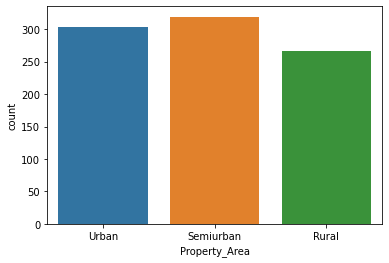

In [71]:
sns.countplot(data=df,x='Property_Area')

In [ ]:
# In above data,most properties are available in semiurban areas and then urban areas.

# show the pie chart of persons education percentage in given data

Text(0.5, 1.0, 'Education pie chart')

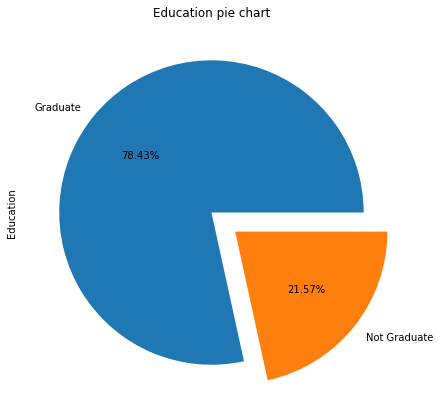

In [76]:
plt.figure(figsize=(7,7))
df['Education'].value_counts().plot.pie(autopct='%1.2f%%',explode=(0,0.2))
plt.title('Education pie chart')

# show the distribution of loan amount and tell what type of distribution is this 

<AxesSubplot:title={'center':'Loan Amount frequency Distribution'}, xlabel='LoanAmount', ylabel='Density'>

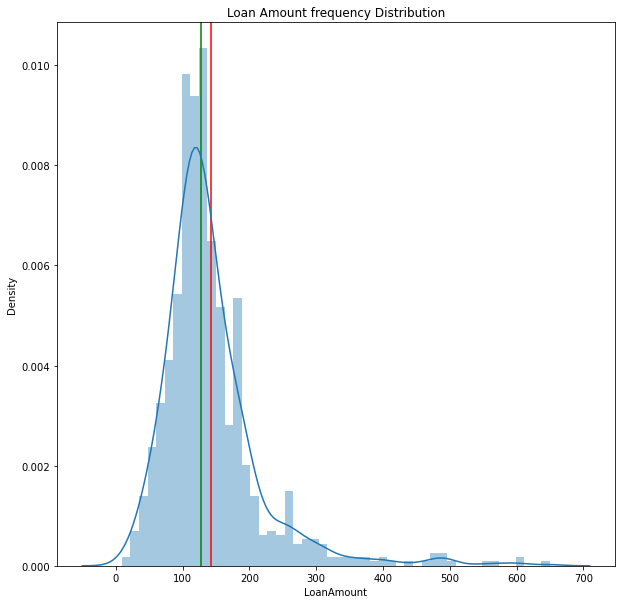

In [80]:
plt.figure(figsize=(10,10))
mean=df['LoanAmount'].mean()
median=df['LoanAmount'].median()
plt.title('Loan Amount frequency Distribution')
plt.axvline(mean,color='red')
plt.axvline(median,color='green')
sns.distplot(df['LoanAmount'])

In [ ]:
# It is a right skeweed data.
# the red line shows the mean of data and green line shows median of data.

In [81]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y


# find if there is any relation between ApplicantIncome	and LoanAmount and wright your insights

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

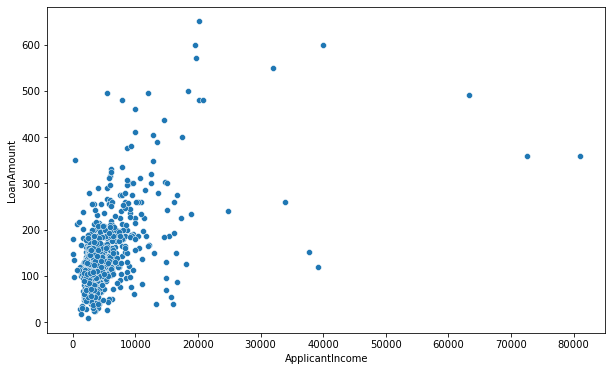

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount')

# show the correlation between all the variables of given data using heatmap

<AxesSubplot:>

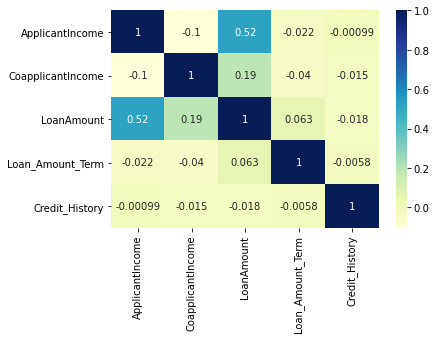

In [96]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')